In [966]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from math import pi
from numpy import sin
from numpy import cos
from numpy import sqrt
from scipy import special
from numpy import exp
from scipy import optimize
from numpy import log
from numpy import tanh
from scipy.optimize import fsolve
from scipy.optimize import brentq

In [698]:
def w1(T):
    return (1.0 - exp(-1*0.1 / T))

def w0(T):
    return (1.0 - w1(T))

def bethe_dos(w):
    return sqrt(4.0-w**2) / (2.0*pi)

In [699]:
def dos(T,w):
    c_electron = w0(T)
    f_electron = w1(T)
    bethe = bethe_dos(w)
    shift_bethe = bethe_dos(w-1.0)
    return 2*(c_electron * bethe + f_electron * shift_bethe)

In [700]:
T0 = 0.0001
T1 = 0.1
T2 = 1.0
omega = np.linspace(-2.0,4.0, 1000)

In [701]:
density_0 = dos(T0, omega)
density_1 = dos(T1, omega)
density_2 = dos(T2, omega)

C:\Users\luoge\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


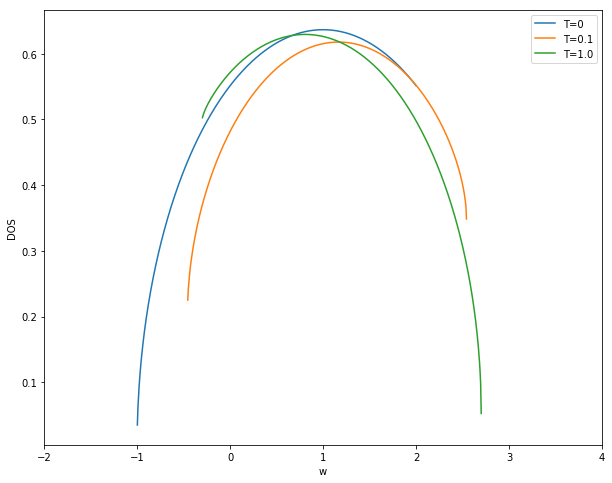

In [894]:
plt.figure(figsize = (10, 8))
plt.ylabel('DOS')
plt.xlabel('w')
plt.xlim(-2.0, 4.0)
plt.plot(omega, density_0, label = 'T=0')
plt.plot(omega-mu_1, density_1, label = 'T=0.1')
plt.plot(omega-mu_2, density_2, label = 'T=1.0')
plt.legend()
plt.show()

In [703]:
dos(0.001,0.5)

0.6164044440614999

In [704]:
steps = 1000
#sum_start = -1000
#sum_end = 1000

In [908]:
def analytic_n_c(T):
    integral_value = 0.0
    startpoint = -1.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / steps
    midpoint = startpoint + 0.5 * interval
       
    for i in range(steps):
        integral_value += dos(T,midpoint)/(1+exp((midpoint)/T)) * interval
        midpoint += interval
    return integral_value

In [909]:
def G_loc(T,n):
    integral_value = 0.0
    startpoint = -1.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / steps
    midpoint = startpoint + 0.5 * interval
       
    for i in range(steps):
        integral_value += dos(T,midpoint)/((1j*pi*T*(2*n+1)) - midpoint) * interval
        midpoint += interval
    return integral_value

In [945]:
temp = 0.1
def func(x):
    integral_value = 0.0
    startpoint = -1.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / steps
    midpoint = startpoint + 0.5 * interval
       
    for i in range(steps):
        integral_value += dos(temp,midpoint)/(1+exp((midpoint-x)/temp)) * interval
        midpoint += interval
    return 2*(integral_value) - w0(temp)
mu = fsolve(func,-1.0)


In [946]:
def n_c(T,n):
    sum_value = 0.0
    matsubara_n = -1*n
    for i in range(int(2*n)):
        #print(matsubara_n)
        sum_value += G_loc(T,matsubara_n) - 1/(1j*pi*T*((2*matsubara_n)+1) + mu)
        matsubara_n = int(matsubara_n + 1)
    return (2*(T * sum_value) + 2/(1+exp(-1*mu/T))).real

In [947]:
n_c(temp,100)

array([0.34062638])

In [948]:
analytic_n_c(temp)

0.4731472797348762

In [949]:
mu

array([-0.54199204])

In [883]:
mu_1

array([-0.54199204])

In [891]:
mu_2

array([-0.70044287])

In [958]:
def self_energy(T,w):
    if T == 0.1:
        mu = mu_1
    if T == 1.0:
        mu = mu_2
    if T == 0.001:
        mu = 0
    return 1/4*(4*mu + 3*sqrt(w**2 - 4) - w)